## Observations and Insights 

In [237]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_complete.head()
mouse_study_complete.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [238]:
# Checking the number of mice.
total_mice = mouse_study_complete["Mouse ID"].unique() #total num of mice
len(total_mice)

249

In [239]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(mouse_study_complete[mouse_study_complete.duplicated(subset = ['Mouse ID','Timepoint'])])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [240]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_complete.set_index("Mouse ID")
only_g989 = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] == "g989", :]
print(only_g989)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [241]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dup_mouse = mouse_study_complete[mouse_study_complete['Mouse ID'] == "g989"].index
mouse_study_complete.drop(dup_mouse, inplace= True)
mouse_study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [242]:
# Checking the number of mice in the clean DataFrame.
mouse_study_complete.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [243]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [244]:
drug_list1 = mouse_study_complete.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
drug_list1

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [245]:
drug_list = mouse_study_complete.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
drug_list

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [246]:
#drug_variance = mouse_study_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
#drug_variance_df = pd.DataFrame({"Avg Tumor Volume": drug_variance})
#drug_variance_df = mouse_study_complete["Avg Tumor Volume": drug_variance.var]
drug_tumor = mouse_study_complete.loc[:, ["Drug Regimen", "Tumor Volume (mm3)"]]
drug_tumor.set_index("Drug Regimen")
Ramicane_drug = drug_tumor[drug_tumor['Drug Regimen'] == "Ramicane"].index
#drug_variance = drug_tumor["Rami"]
#what i want here... to group by each drug after it has calculated the mean and variance


In [247]:
stats_summary = pd.DataFrame({"Mean": drug_list1, "Median": drug_list})
stats_summary
#print(f"{round(stats_summary.Mean.std(),2)}")
#sem(sample.Combined_MPG)}


,Mean,Median
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [255]:
total_drugs = mouse_study_complete["Drug Regimen"].unique() #total num of drug regimens
len(total_drugs)

10

In [261]:
genders = mouse_study_complete["Sex"].unique()
genders

array(['Male', 'Female'], dtype=object)

In [264]:
avg_age = mouse_study_complete["Age_months"].mean()
round(avg_age,2)

12.76

In [265]:
avg_wgt = mouse_study_complete["Weight (g)"].mean()
round(avg_wgt,2)

25.66

In [267]:
max_time = mouse_study_complete["Timepoint"].max()
max_time

45

In [268]:
min_time = mouse_study_complete["Timepoint"].min()
min_time

0

In [269]:
tum_vol =  mouse_study_complete["Tumor Volume (mm3)"].mean()
tum_vol

50.435293232255326

In [270]:
avg_mest = mouse_study_complete["Metastatic Sites"].mean()
avg_mest

1.025

In [274]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_sngl = pd.DataFrame({"Total Mice IDs": [len(total_mice)], "No. Drug Regimens": [len(total_drugs)], "Genders": [genders], "Avg Age (mos.)": [round(avg_age,2)], "Avg Weight (g)": [round(avg_wgt,2)], "Max Time": [max_time], "Avg Tumor Vol.": [tum_vol], "Avg Metastic Sites": [avg_mest]})
summary_sngl


,Total Mice IDs,No. Drug Regimens,Genders,Avg Age (mos.),Avg Weight (g),Max Time,Avg Tumor Vol.,Avg Metastic Sites
0,249,10,"[Male, Female]",12.76,25.66,45,50.435293,1.025


## Bar and Pie Charts

In [283]:
total_mice = mouse_study_complete["Drug Regimen"].value_counts()
total_mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Mice in Trial')

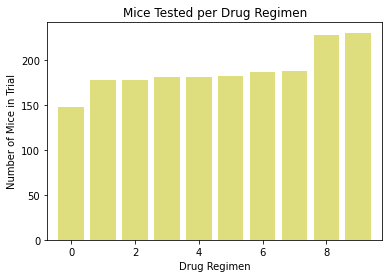

In [294]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice = [148, 178, 178, 181, 181, 182, 186, 188, 228, 230]
x_axis = np.arange(len(mice))
plt.bar(x_axis, mice, color='y', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva "])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.title("Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice in Trial")

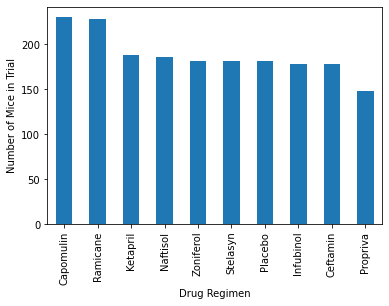

<Figure size 432x288 with 0 Axes>

In [295]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
ttlmice_chart = total_mice.plot(kind='bar')
ttlmice_chart.set_xlabel("Drug Regimen")
ttlmice_chart.set_ylabel("Number of Mice in Trial")

plt.show()
plt.tight_layout() 


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
